## Keras -- MLPs on MNIST

In [2]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

print(tf.__version__)

Using TensorFlow backend.


2.2.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    # fig.canvas.draw()
    plt.show()

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [6]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

print(X_train.shape)

(60000, 784)


In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [8]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [10]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h2>  Softmax classifier  </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 100

In [0]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

<h2> MLP + Batch-Norm on hidden Layers + AdamOptimizer </2>

#### Architecture 1 with 2 hidden layers ####


In [55]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

#lets use He initialization technique as it works well on Relu Activations

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(384, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(192, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.072, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 384)               301440    
_________________________________________________________________
batch_normalization_7 (Batch (None, 384)               1536      
_________________________________________________________________
dense_14 (Dense)             (None, 192)               73920     
_________________________________________________________________
batch_normalization_8 (Batch (None, 192)               768       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1930      
Total params: 379,594
Trainable params: 378,442
Non-trainable params: 1,152
_________________________________________________________________


In [17]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1931 - accuracy: 0.9411 - val_loss: 0.1096 - val_accuracy: 0.9668
Epoch 2/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.0746 - accuracy: 0.9773 - val_loss: 0.0968 - val_accuracy: 0.9686
Epoch 3/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0769 - val_accuracy: 0.9758
Epoch 4/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0731 - val_accuracy: 0.9771
Epoch 5/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0845 - val_accuracy: 0.9764
Epoch 6/100
60000/60000 [==============================] - 3s 52us/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0758 - val_accuracy: 0.9745
Epoch 7/100
60000/60000 [==============================] - 3s 

Test score: 0.0974129941530435
Test accuracy: 0.9837999939918518


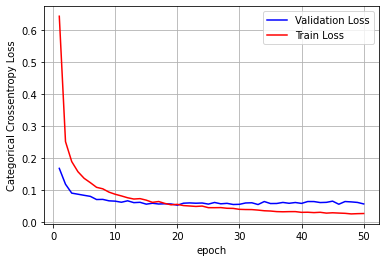

In [52]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1,figsize=(20,10))
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

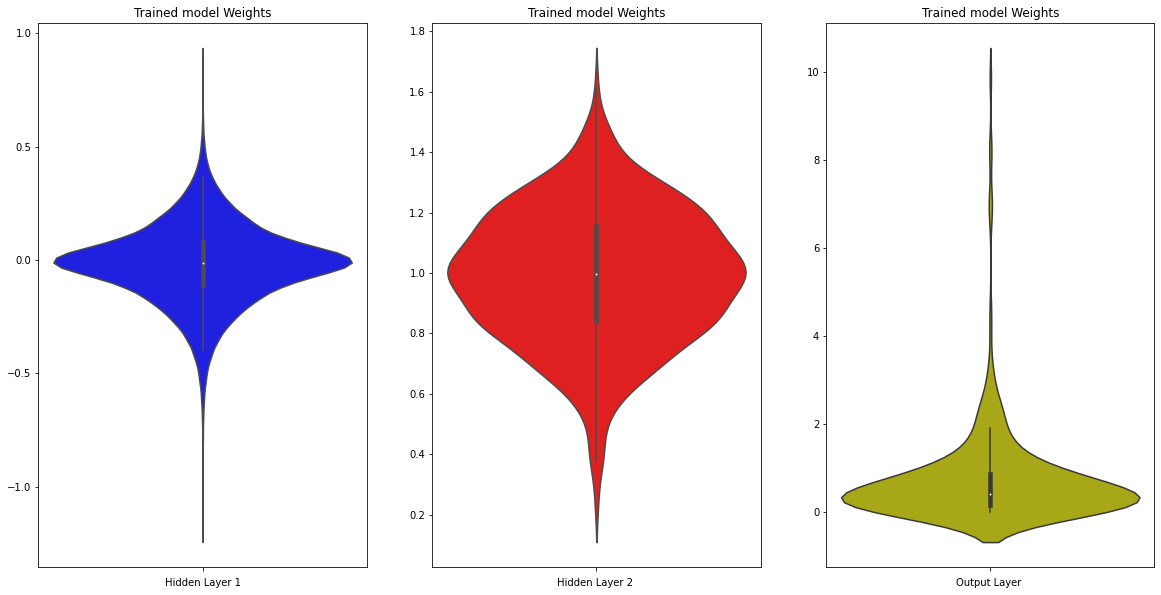

In [42]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(20,10))
# plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()



<h2> 5. MLP + Dropout + AdamOptimizer </h2>

#### Architecture 2 with 3 hidden layers (without dropouts and batch norm) ####


In [72]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
#vanilla three layer MLP

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(580, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))

model_drop.add(Dense(324, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)) )

model_drop.add(Dense(96, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.079, seed=None)) )

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 580)               455300    
_________________________________________________________________
dense_25 (Dense)             (None, 324)               188244    
_________________________________________________________________
dense_26 (Dense)             (None, 96)                31200     
_________________________________________________________________
dense_27 (Dense)             (None, 10)                970       
Total params: 675,714
Trainable params: 675,714
Non-trainable params: 0
_________________________________________________________________


In [73]:
nb_epoch = 50 

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2195 - accuracy: 0.9347 - val_loss: 0.1091 - val_accuracy: 0.9663
Epoch 2/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.0815 - accuracy: 0.9747 - val_loss: 0.0786 - val_accuracy: 0.9741
Epoch 3/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0532 - accuracy: 0.9832 - val_loss: 0.0836 - val_accuracy: 0.9742
Epoch 4/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0398 - accuracy: 0.9875 - val_loss: 0.0711 - val_accuracy: 0.9793
Epoch 5/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0298 - accuracy: 0.9901 - val_loss: 0.0813 - val_accuracy: 0.9767
Epoch 6/50
60000/60000 [==============================] - 2s 36us/step - loss: 0.0245 - accuracy: 0.9919 - val_loss: 0.0795 - val_accuracy: 0.9786
Epoch 7/50
60000/60000 [==============================] - 2s 36us/st

Test score: 0.10565671544922457
Test accuracy: 0.9836000204086304


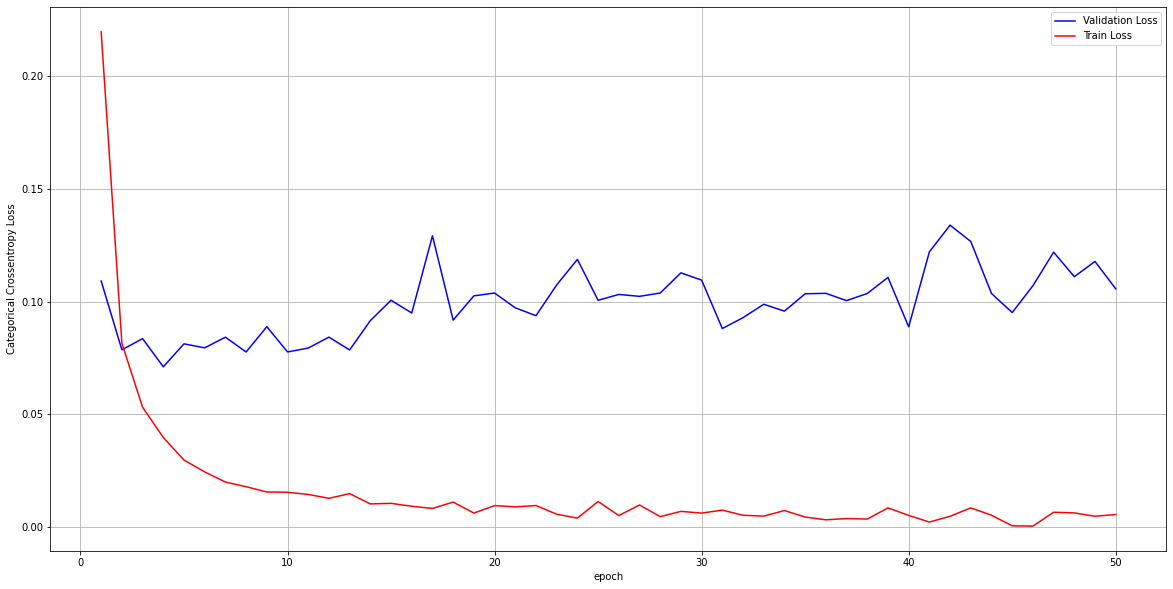

In [74]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1,figsize=(20,10))
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

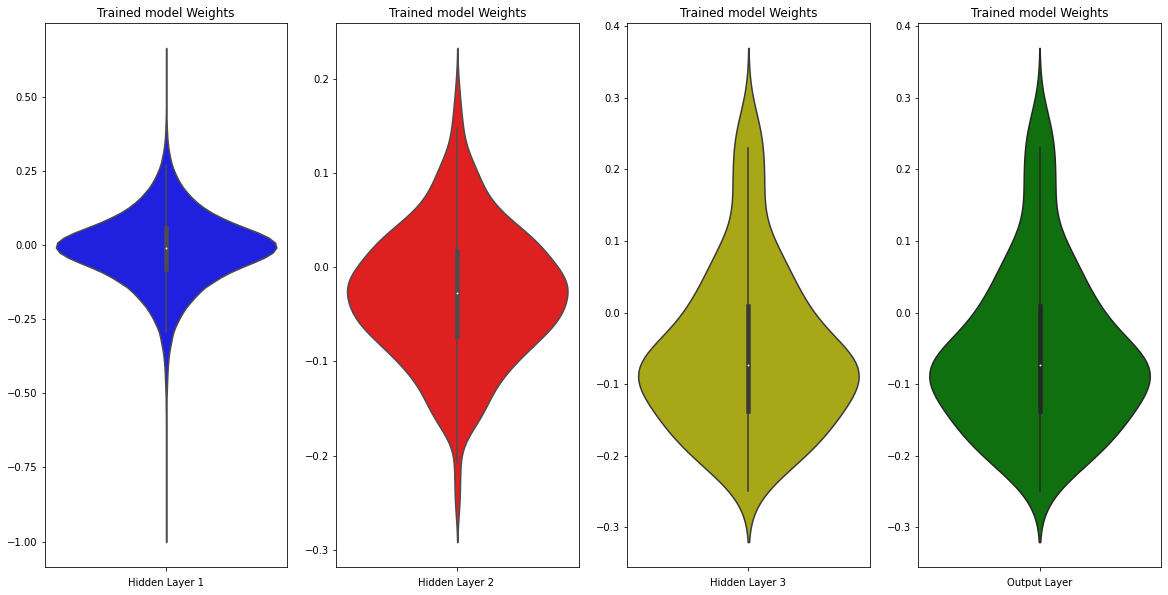

In [78]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[1].flatten().reshape(-1,1)
h3_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[3].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='g')
plt.xlabel('Output Layer')
plt.show()

#### Architecture 2 with 3 hidden layers (with dropouts and batch norm on later layers) ####


In [64]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
#lets add Batch normalization only in second and third layer

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(580, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(324, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))


model_drop.add(Dense(96, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.079, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 580)               455300    
_________________________________________________________________
dropout_7 (Dropout)          (None, 580)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 324)               188244    
_________________________________________________________________
batch_normalization_9 (Batch (None, 324)               1296      
_________________________________________________________________
dropout_8 (Dropout)          (None, 324)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 96)                31200     
_________________________________________________________________
batch_normalization_10 (Batc (None, 96)               

In [65]:
nb_epoch = 50 

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.6372 - accuracy: 0.8052 - val_loss: 0.1641 - val_accuracy: 0.9481
Epoch 2/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.2556 - accuracy: 0.9249 - val_loss: 0.1237 - val_accuracy: 0.9628
Epoch 3/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1916 - accuracy: 0.9445 - val_loss: 0.0991 - val_accuracy: 0.9682
Epoch 4/50
60000/60000 [==============================] - 3s 58us/step - loss: 0.1551 - accuracy: 0.9549 - val_loss: 0.0894 - val_accuracy: 0.9720
Epoch 5/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1374 - accuracy: 0.9599 - val_loss: 0.0864 - val_accuracy: 0.9733
Epoch 6/50
60000/60000 [==============================] - 3s 57us/step - loss: 0.1225 - accuracy: 0.9647 - val_loss: 0.0786 - val_accuracy: 0.9763
Epoch 7/50
60000/60000 [==============================] - 3s 58us/st

Test score: 0.05603685078956478
Test accuracy: 0.9865999817848206


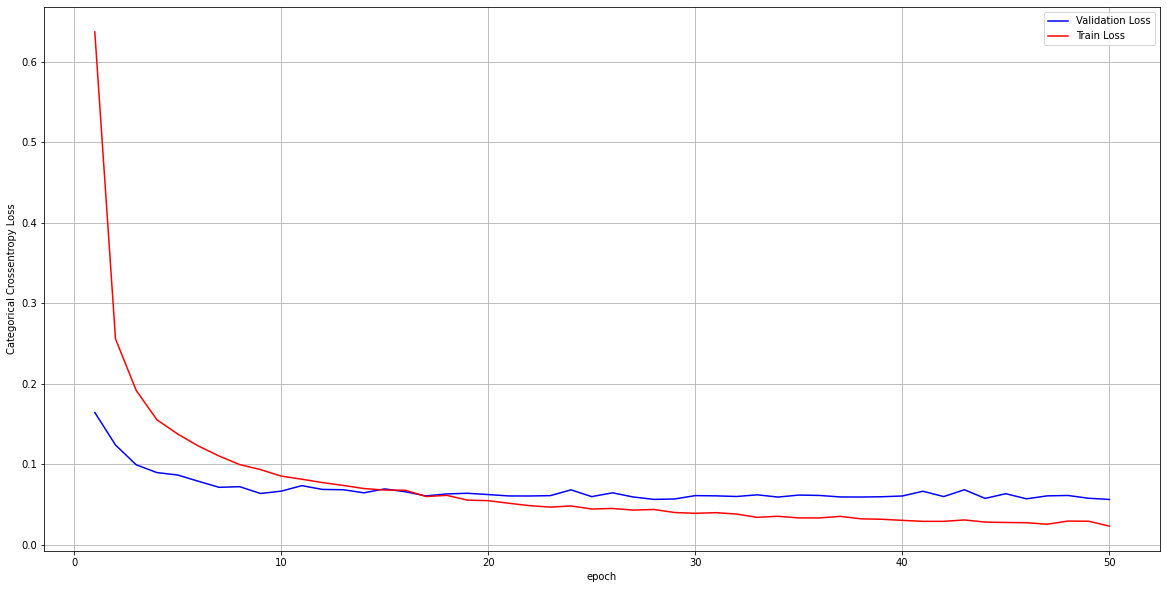

In [66]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1,figsize=(20,10))
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

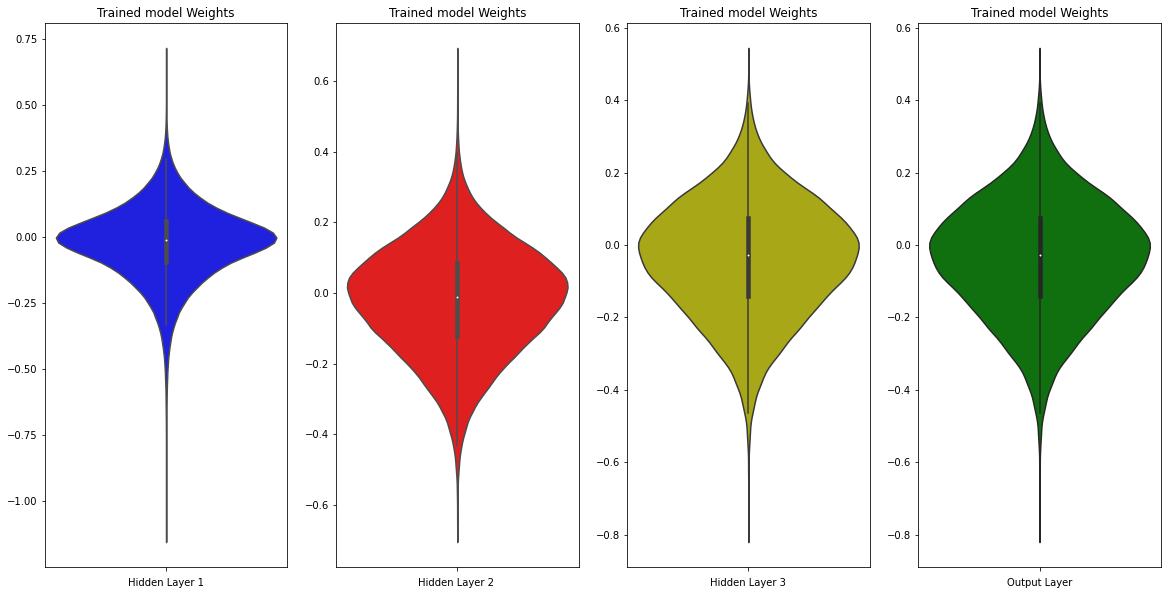

In [71]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[5].flatten().reshape(-1,1)
out_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='g')
plt.xlabel('Output Layer')
plt.show()

### Architecture 3 with 4 hidden layers(no dropouts/batch norm)### 

In [85]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
#vanilla four layer MLP

model_drop = Sequential()

model_drop.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))

model_drop.add(Dense(468, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.057, seed=None)) )

model_drop.add(Dense(212, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.065, seed=None)) )

model_drop.add(Dense(110, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.097, seed=None)) )

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 612)               480420    
_________________________________________________________________
dense_34 (Dense)             (None, 468)               286884    
_________________________________________________________________
dense_35 (Dense)             (None, 212)               99428     
_________________________________________________________________
dense_36 (Dense)             (None, 110)               23430     
_________________________________________________________________
dense_37 (Dense)             (None, 10)                1110      
Total params: 891,272
Trainable params: 891,272
Non-trainable params: 0
_________________________________________________________________


In [86]:
nb_epoch = 50 

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 44us/step - loss: 0.2077 - accuracy: 0.9385 - val_loss: 0.1074 - val_accuracy: 0.9645
Epoch 2/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.0817 - accuracy: 0.9744 - val_loss: 0.0786 - val_accuracy: 0.9769
Epoch 3/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.0562 - accuracy: 0.9821 - val_loss: 0.0846 - val_accuracy: 0.9740
Epoch 4/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0423 - accuracy: 0.9863 - val_loss: 0.0699 - val_accuracy: 0.9798
Epoch 5/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0366 - accuracy: 0.9879 - val_loss: 0.0871 - val_accuracy: 0.9754
Epoch 6/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.0279 - accuracy: 0.9911 - val_loss: 0.0759 - val_accuracy: 0.9793
Epoch 7/50
60000/60000 [==============================] - 2s 40us/st

Test score: 0.1300398728771364
Test accuracy: 0.980400025844574


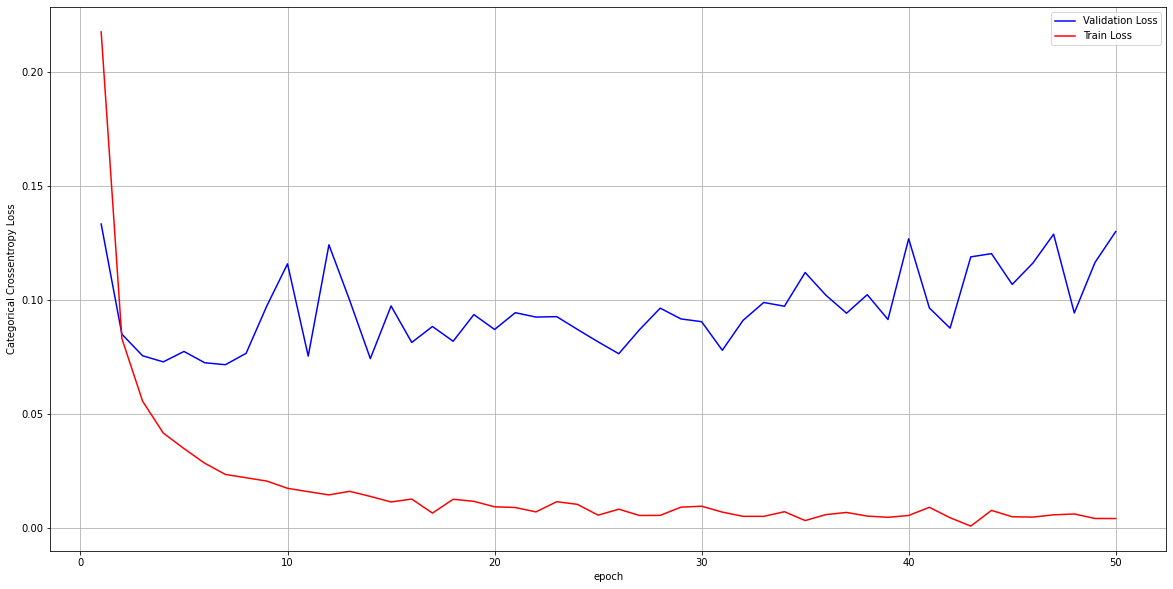

In [81]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1,figsize=(20,10))
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

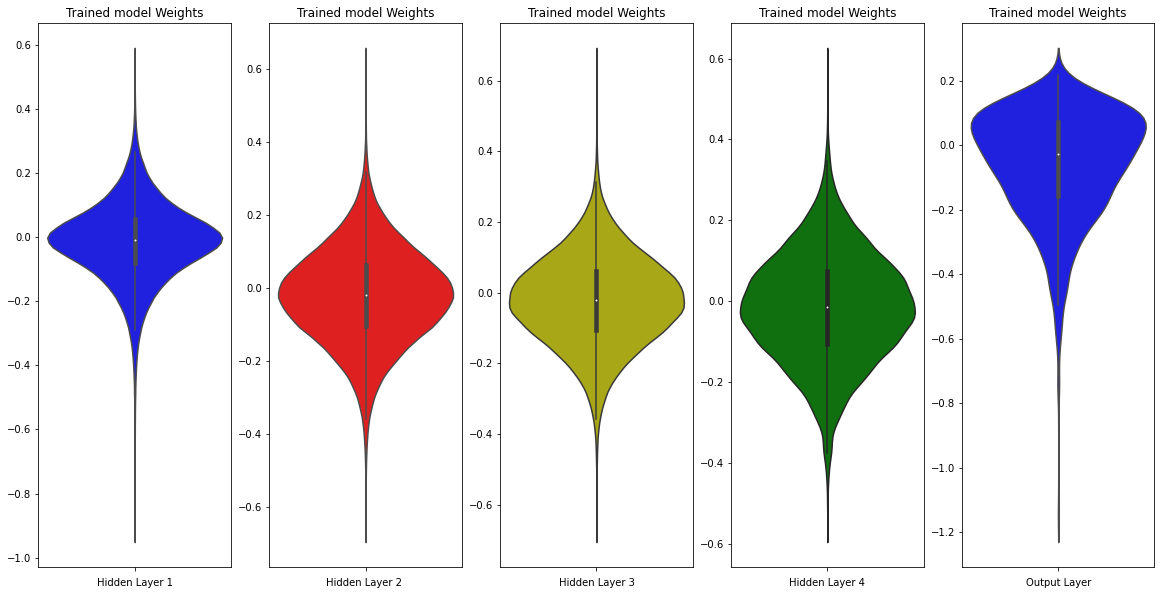

In [102]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
out_w = w_after[8].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='g')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='b')
plt.xlabel('Output Layer')
plt.show()

### Architecture 3 with 4 hidden layers(with dropouts and batch norm in later layers)### 


In [103]:
model_drop = Sequential()

model_drop.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(468, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)))
model_drop.add(Dropout(0.5))


model_drop.add(Dense(212, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.079, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(110, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.079, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 612)               480420    
_________________________________________________________________
dropout_10 (Dropout)         (None, 612)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 468)               286884    
_________________________________________________________________
dropout_11 (Dropout)         (None, 468)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 212)               99428     
_________________________________________________________________
batch_normalization_11 (Batc (None, 212)               848       
_________________________________________________________________
dropout_12 (Dropout)         (None, 212)             

In [104]:

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.8664 - accuracy: 0.7330 - val_loss: 0.1930 - val_accuracy: 0.9422
Epoch 2/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2894 - accuracy: 0.9178 - val_loss: 0.1340 - val_accuracy: 0.9610
Epoch 3/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.2110 - accuracy: 0.9408 - val_loss: 0.1073 - val_accuracy: 0.9676
Epoch 4/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.1733 - accuracy: 0.9518 - val_loss: 0.0900 - val_accuracy: 0.9731
Epoch 5/50
60000/60000 [==============================] - 4s 65us/step - loss: 0.1539 - accuracy: 0.9560 - val_loss: 0.0887 - val_accuracy: 0.9746
Epoch 6/50
60000/60000 [==============================] - 4s 64us/step - loss: 0.1347 - accuracy: 0.9618 - val_loss: 0.0812 - val_accuracy: 0.9768
Epoch 7/50
60000/60000 [==============================] - 4s 66us/st

Test score: 0.06427826447688276
Test accuracy: 0.9853000044822693


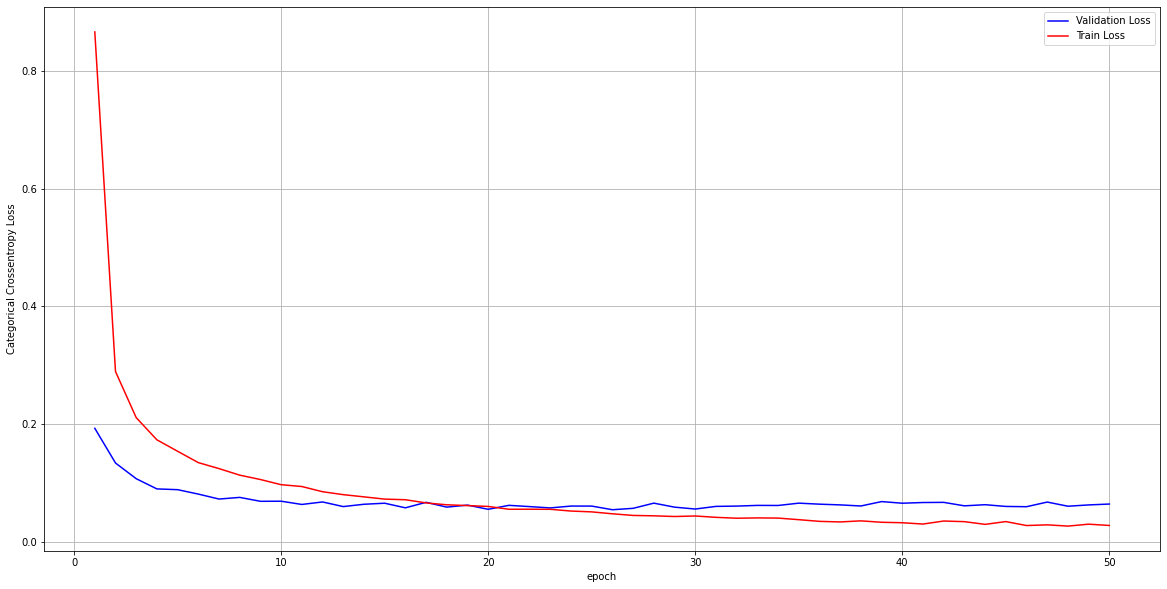

In [105]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1,figsize=(20,10))
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

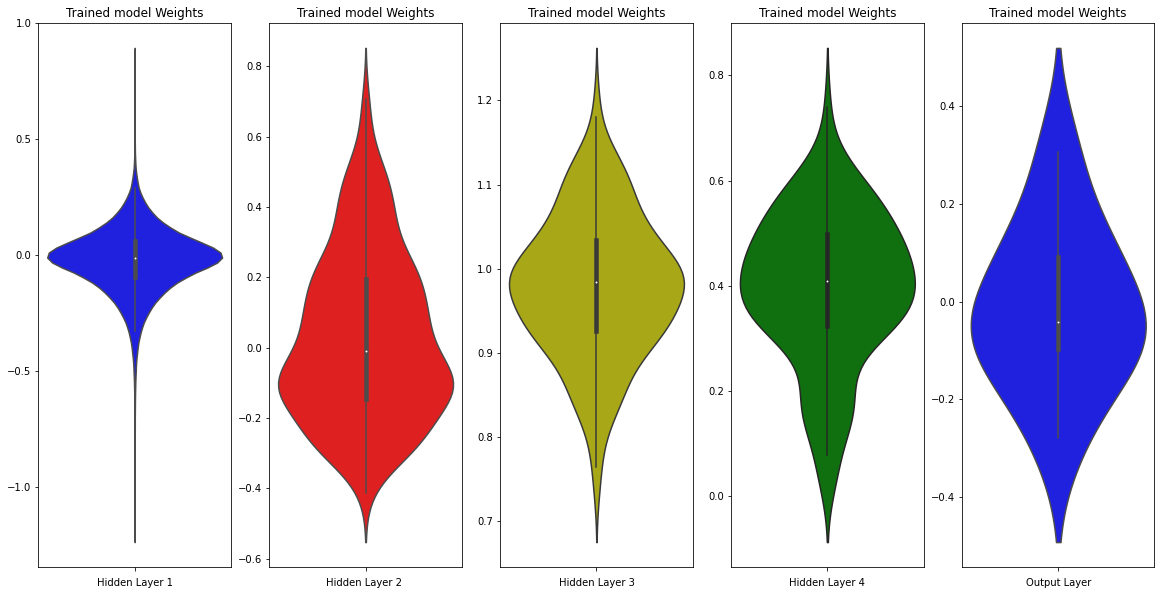

In [110]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[3].flatten().reshape(-1,1)
h3_w = w_after[6].flatten().reshape(-1,1)
h4_w = w_after[11].flatten().reshape(-1,1)
out_w = w_after[17].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 5, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 5, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 5, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 5, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='g')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 5, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='b')
plt.xlabel('Output Layer')
plt.show()

### Architecture 4 with 5 hidden layers(without dropouts and batch norm in later layers)### 


In [112]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
#vanilla five layer MLP

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(624, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.056, seed=None)))

model_drop.add(Dense(472, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.065, seed=None)) )

model_drop.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)) )

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.176, seed=None)) )

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 624)               489840    
_________________________________________________________________
dense_44 (Dense)             (None, 472)               295000    
_________________________________________________________________
dense_45 (Dense)             (None, 256)               121088    
_________________________________________________________________
dense_46 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_47 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_48 (Dense)             (None, 10)                650       
Total params: 947,730
Trainable params: 947,730
Non-trainable params: 0
_______________________________________________

In [113]:

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 45us/step - loss: 0.2386 - accuracy: 0.9275 - val_loss: 0.1119 - val_accuracy: 0.9653
Epoch 2/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.0874 - accuracy: 0.9731 - val_loss: 0.0930 - val_accuracy: 0.9724
Epoch 3/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.0611 - accuracy: 0.9803 - val_loss: 0.0904 - val_accuracy: 0.9745
Epoch 4/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.0439 - accuracy: 0.9861 - val_loss: 0.0722 - val_accuracy: 0.9787
Epoch 5/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0890 - val_accuracy: 0.9760
Epoch 6/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0815 - val_accuracy: 0.9764
Epoch 7/50
60000/60000 [==============================] - 2s 40us/st

Test score: 0.12296321296156254
Test accuracy: 0.9836999773979187


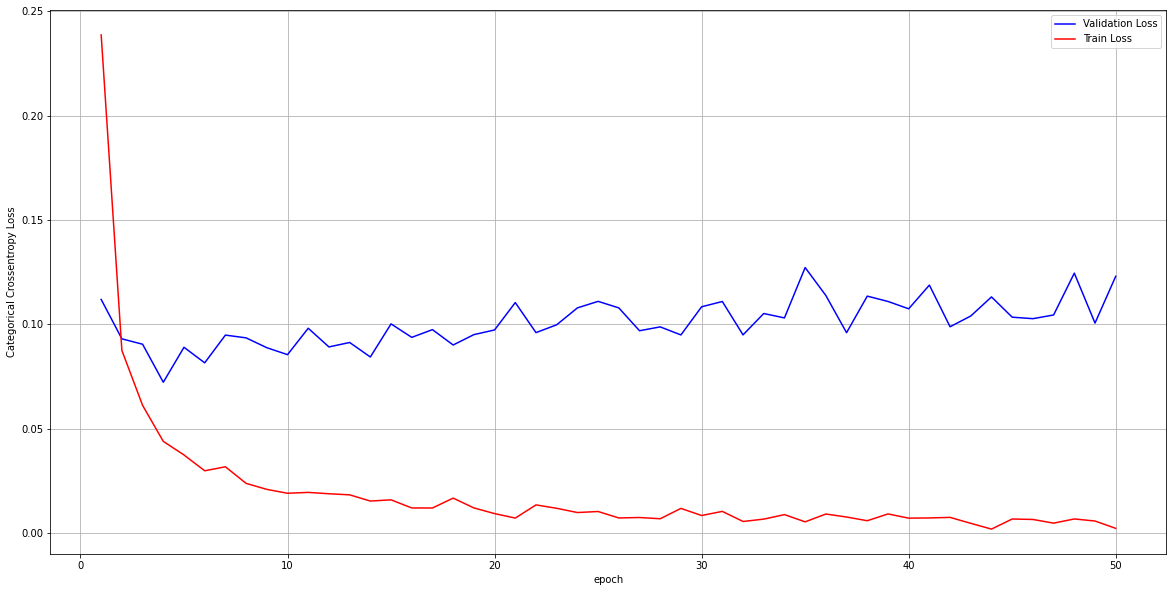

In [114]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1,figsize=(20,10))
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

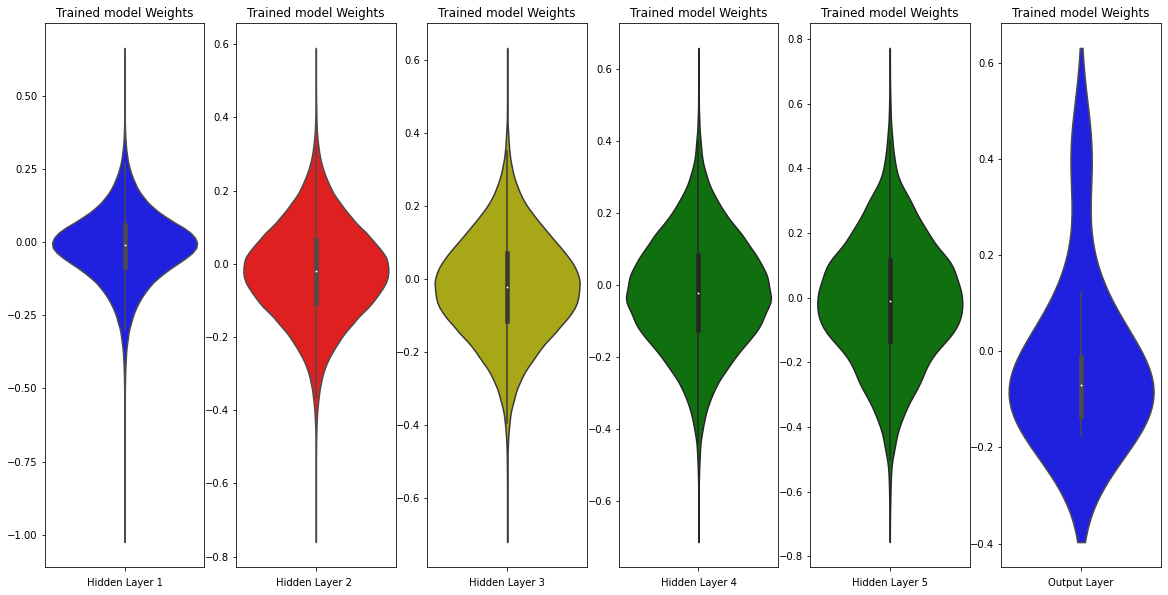

In [120]:
# w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[11].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='g')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='g')
plt.xlabel('Hidden Layer 5')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='b')
plt.xlabel('Output Layer')
plt.show()

### Architecture 4 with 5 hidden layers(with dropouts and batch norm in later layers)### 



In [118]:
model_drop = Sequential()

model_drop.add(Dense(624, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.051, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(472, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)))
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.079, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.079, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 624)               489840    
_________________________________________________________________
dropout_14 (Dropout)         (None, 624)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 472)               295000    
_________________________________________________________________
dropout_15 (Dropout)         (None, 472)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 256)               121088    
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)             

In [119]:

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 80us/step - loss: 1.2862 - accuracy: 0.5886 - val_loss: 0.2715 - val_accuracy: 0.9266
Epoch 2/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.4005 - accuracy: 0.8888 - val_loss: 0.1632 - val_accuracy: 0.9529
Epoch 3/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.2708 - accuracy: 0.9289 - val_loss: 0.1343 - val_accuracy: 0.9644
Epoch 4/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.2205 - accuracy: 0.9435 - val_loss: 0.1068 - val_accuracy: 0.9712
Epoch 5/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.1888 - accuracy: 0.9523 - val_loss: 0.1004 - val_accuracy: 0.9738
Epoch 6/50
60000/60000 [==============================] - 4s 72us/step - loss: 0.1658 - accuracy: 0.9571 - val_loss: 0.1021 - val_accuracy: 0.9733
Epoch 7/50
60000/60000 [==============================] - 4s 71us/st

Test score: 0.06781607029834122
Test accuracy: 0.9853000044822693


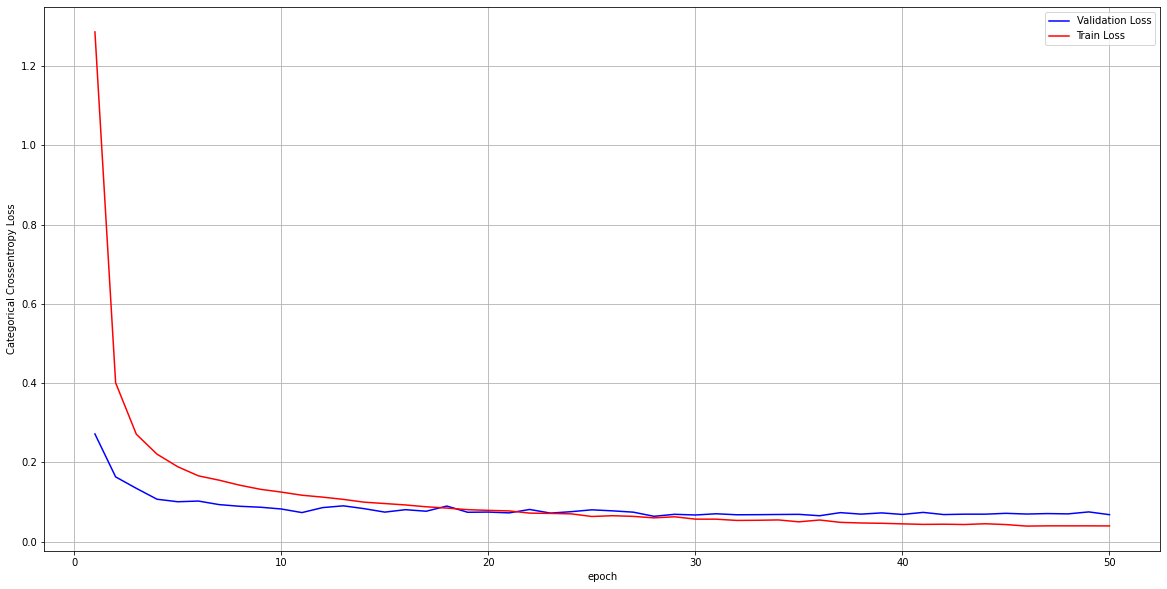

In [121]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1,figsize=(20,10))
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

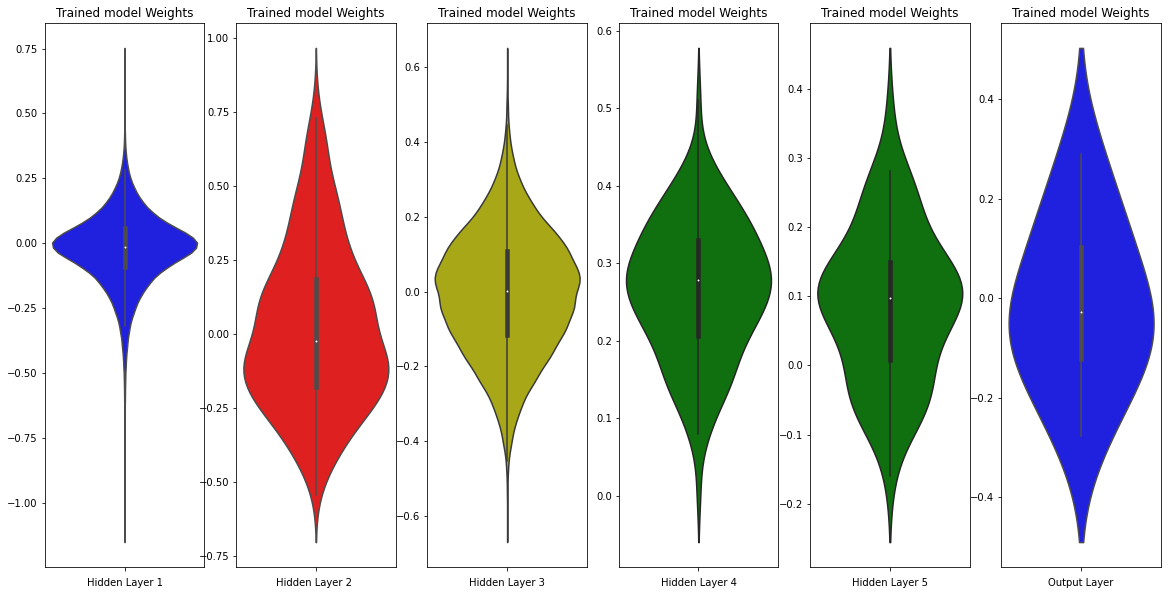

In [128]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[3].flatten().reshape(-1,1)
h3_w = w_after[6].flatten().reshape(-1,1)
h4_w = w_after[9].flatten().reshape(-1,1)
h5_w = w_after[15].flatten().reshape(-1,1)
out_w = w_after[19].flatten().reshape(-1,1)

fig = plt.figure(figsize=(20,10))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w,color='y')
plt.xlabel('Hidden Layer 3')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w,color='g')
plt.xlabel('Hidden Layer 4')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w,color='g')
plt.xlabel('Hidden Layer 5')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='b')
plt.xlabel('Output Layer')
plt.show()

#CONCLUSION#
  1. MLPs were implemented using keras and multiple architectures were tried.
  2. WE plot train and test losses for 2,3,4 and 5 hidden layer MLPs with and without dropouts/batch normalization.
  3. It was found that MLPs with drop outs and batch normalization tend to outperform the same without dropout/batch norm.
  4. We observed that it was easy to overfit when the number of layers increased. 

  

In [131]:
from prettytable import PrettyTable
x = PrettyTable(["Number of Hidden Layers", "Validation Accuracy", "Dropout", "BatchNorm" ])
x.add_row([2,98.38,0,0 ])
x.add_row([3,98.36,0,0 ])
x.add_row([3,98.66,3,2 ])
x.add_row([4,98.32,0,0 ])
x.add_row([4,98.53,4,2 ])
x.add_row([5,98.37,0,0 ])
x.add_row([5,98.53,5,2 ])

print(x)


+-------------------------+---------------------+---------+-----------+
| Number of Hidden Layers | Validation Accuracy | Dropout | BatchNorm |
+-------------------------+---------------------+---------+-----------+
|            2            |        98.38        |    0    |     0     |
|            3            |        98.36        |    0    |     0     |
|            3            |        98.66        |    3    |     2     |
|            4            |        98.32        |    0    |     0     |
|            4            |        98.53        |    4    |     2     |
|            5            |        98.37        |    0    |     0     |
|            5            |        98.53        |    5    |     2     |
+-------------------------+---------------------+---------+-----------+
